<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Keras/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Keras

Keras is an open-source neural network library written in Python that enables developers to easily design, build, and train deep learning models. It is a high-level API built on top of lower-level neural network libraries such as TensorFlow, Theano, and CNTK, providing a simpler and more intuitive way to create deep learning models. Keras allows users to quickly build and prototype deep learning models with minimal coding and provides a range of tools for implementing a variety of neural network architectures, such as convolutional neural networks (CNNs) and recurrent neural networks (RNNs). Additionally, Keras provides easy-to-use interfaces for data preprocessing, model evaluation, and visualization, making it an accessible tool for both beginners and experienced developers alike. With its user-friendly interface, flexibility, and wide range of applications, Keras has become a popular choice for implementing deep learning models in a variety of fields, including computer vision, natural language processing, and robotics.

#Build and Train Neural Networks

The purpose of this notebook is to employ a neural network to predict diabetes. To begin, we will establish a performance baseline by training a Random Forest model. Subsequently, we will use the Keras package to construct and train a neural network swiftly and evaluate its performance in comparison to the Random Forest model. Furthermore, we will investigate how diverse network structures influence performance, training time, and the degree of overfitting or underfitting.



**Attributes**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

#Importing Librabry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Import Sklearn for Machine Learning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,accuracy_score,roc_curve
from sklearn.ensemble import RandomForestClassifier

Import Keras objects for Deep Learning

In [3]:
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam,SGD,RMSprop

#Data Profiling

In [4]:
data_01  = pd.read_csv( "https://raw.githubusercontent.com/UM1412/Data-Set/main/Keras%20Data.csv" )

In [5]:
data_01.sample( 8 )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
592,3,132,80,0,0,34.4,0.402,44,1
450,1,82,64,13,95,21.2,0.415,23,0
615,3,106,72,0,0,25.8,0.207,27,0
735,4,95,60,32,0,35.4,0.284,28,0
135,2,125,60,20,140,33.8,0.088,31,0
472,0,119,66,27,0,38.8,0.259,22,0
562,1,87,68,34,77,37.6,0.401,24,0
139,5,105,72,29,325,36.9,0.159,28,0


In [6]:
data_01.shape

(768, 9)

In [7]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data_01.describe ( include = "all" ).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
data_01.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
x = data_01.iloc[ : , :-1 ].values
y = data_01[ "Outcome" ]

#Split the Data Set Into Training & Test(75%,25%)

In [11]:
x_train,x_test,y_train,y_test  = train_test_split ( x , y , test_size = 0.25 )

In [12]:
np.mean( y )

0.3489583333333333

In [13]:
np.mean( 1-y )

0.6510416666666666

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not. This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.

#Random Forest

**To begin, and get a baseline for classifier performance:
Train a Random Forest model with 200 trees on the training data.
Calculate the accuracy and roc_auc_score of the predictions**

Train the RF Model

In [14]:
Model_01 = RandomForestClassifier( n_estimators=200 )

In [15]:
Model_01.fit( x_train , y_train )

RandomForestClassifier(n_estimators=200)

Predictions on the Test Set

In [16]:
y_class = Model_01.predict( x_test )
y_prob = Model_01.predict_proba( x_test )

In [17]:
print( "Accuracy = {} ".format( accuracy_score( y_test,y_class ) ) )
print( "Roc-Acc = {} ".format(roc_auc_score( y_test,y_prob[:,1]) ) )

Accuracy = 0.75 
Roc-Acc = 0.8100990905388897 


In [18]:
def plot(y_test,y_pred,modelname):
    fpr,tpr,thr =  roc_curve( y_test,y_pred )
    fig, ax = plt.subplots( figsize=(25,25))
    ax.plot(fpr,tpr,"k-")
    ax.plot([0,1],[0,1],"k--",linewidth= 0.6)
    ax.grid(True)
    ax.set(title = "ROC Curve for {} on Diabetes Data Problem.".format(modelname),xlim=[-0.01,1.01])

Plot the roc curve

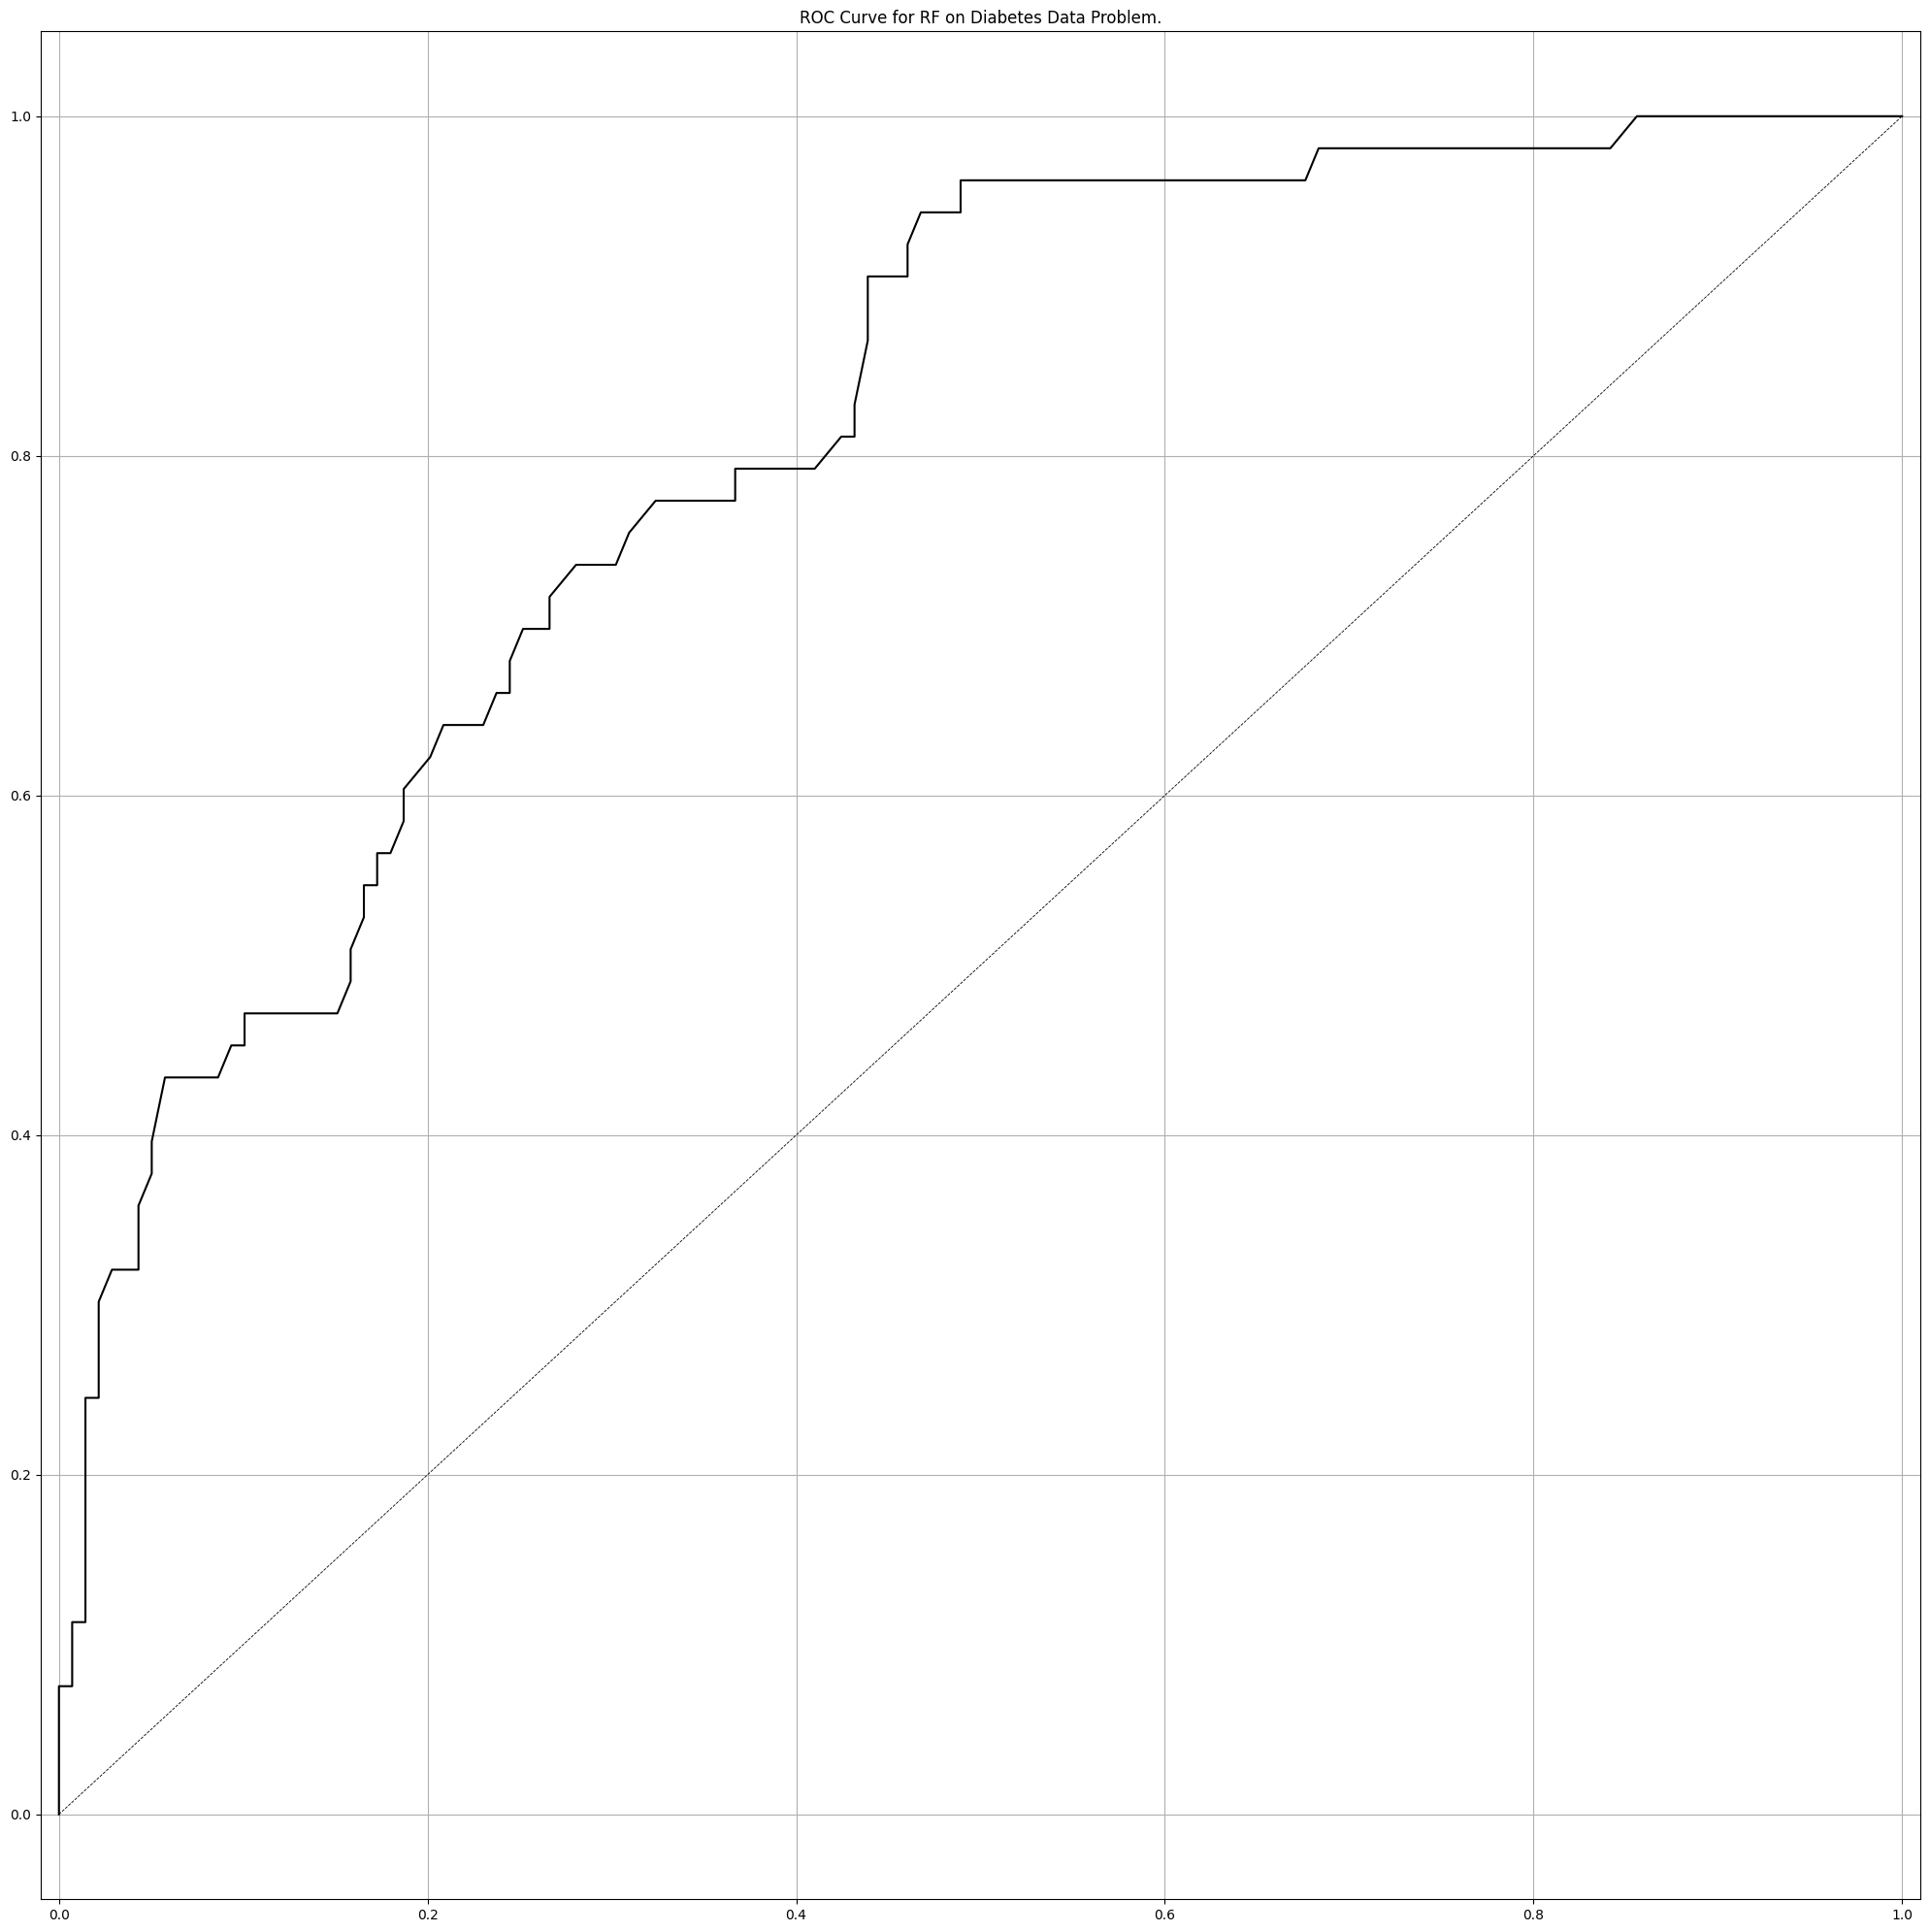

In [19]:
plot(y_test,y_prob[:,1],"RF")

#Single Hidden Layer Neural Network 

**Sequential model to quickly build a neural network. Our first network will be a single layer network. We have 8 variables, so we set the input shape to 8. Let's start by having a single hidden layer with 12 nodes.**

First let's normalize the data.Training of neural nets by providing numerical stability

In [20]:
nomalizer = StandardScaler()

In [21]:
x_train_norm = nomalizer.fit_transform( x_train )
x_test_norm = nomalizer.transform( x_test )

Define the Model.Input size is 8-dimensional.1 hidden layer, 12 hidden nodes, sigmoid activation.Final layer has just one node with a sigmoid activation (standard for binary classification)

In [22]:
Model_02 = Sequential()

In [23]:
Model_02.add(Dense(12,input_shape = (8, ),activation="sigmoid"))
Model_02.add(Dense(1,activation="sigmoid"))

View the model & count the parameters

In [24]:
Model_02.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


##Fit(Train) the Model

Compile the model with Optimizer, Loss Function and Metrics.Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

In [25]:
Model_02.compile(SGD(learning_rate=0.003),"binary_crossentropy",metrics = ["Accuracy"])
Run_Hist_01 = Model_02.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 35ms/step - loss: 0.6155 - Accuracy: 0.6372 - val_loss: 0.5750 - val_Accuracy: 0.7188
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6149 - Accuracy: 0.6372 - val_loss: 0.5741 - val_Accuracy: 0.7188
Epoch 3/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6144 - Accuracy: 0.6389 - val_loss: 0.5733 - val_Accuracy: 0.7240
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 0.6138 - Accuracy: 0.6389 - val_loss: 0.5725 - val_Accuracy: 0.7240
Epoch 5/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6133 - Accuracy: 0.6406 - val_loss: 0.5717 - val_Accuracy: 0.7240
Epoch 6/200
18/18 [==============================] - 0s 16ms/step - loss: 0.6127 - Accuracy: 0.6424 - val_loss: 0.5710 - val_Accuracy: 0.7188
Epoch 7/200
18/18 [==============================] - 0s 19ms/step - loss: 0.6122 - Accuracy: 0.6406 - val_loss: 0.5702 - val_Accuracy: 0.7188
Epoch 8/

In [26]:
y_predprob = Model_02.predict(x_test_norm)
y_predclass = y_predprob.argmax(axis = -1)

6/6 [==============================] - 0s 2ms/step


In [27]:
y_predprob

array([[0.39933035],
       [0.6236548 ],
       [0.17711988],
       [0.27158633],
       [0.3729902 ],
       [0.5073376 ],
       [0.21121106],
       [0.48202574],
       [0.25815827],
       [0.25154275],
       [0.29772028],
       [0.53235155],
       [0.6226965 ],
       [0.33390498],
       [0.20830242],
       [0.23054127],
       [0.50845027],
       [0.316528  ],
       [0.4543619 ],
       [0.45367584],
       [0.20830095],
       [0.39014155],
       [0.452454  ],
       [0.43963268],
       [0.23968586],
       [0.41339025],
       [0.17374127],
       [0.33644783],
       [0.2917517 ],
       [0.16362755],
       [0.23990422],
       [0.1621184 ],
       [0.69722366],
       [0.3441014 ],
       [0.1747738 ],
       [0.22581798],
       [0.2971566 ],
       [0.28684938],
       [0.17966148],
       [0.5848255 ],
       [0.2020568 ],
       [0.39623028],
       [0.31947088],
       [0.290675  ],
       [0.24987146],
       [0.40076625],
       [0.24843758],
       [0.343

In [28]:
y_predclass

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

 Model performance and plot the roc curve

In [29]:
print( "Accuracy = {} ".format( accuracy_score( y_test,y_predclass ) ) )
print( "Roc-Acc = {} ".format(roc_auc_score( y_test,y_predprob) ) )

Accuracy = 0.7239583333333334 
Roc-Acc = 0.8265236867110086 


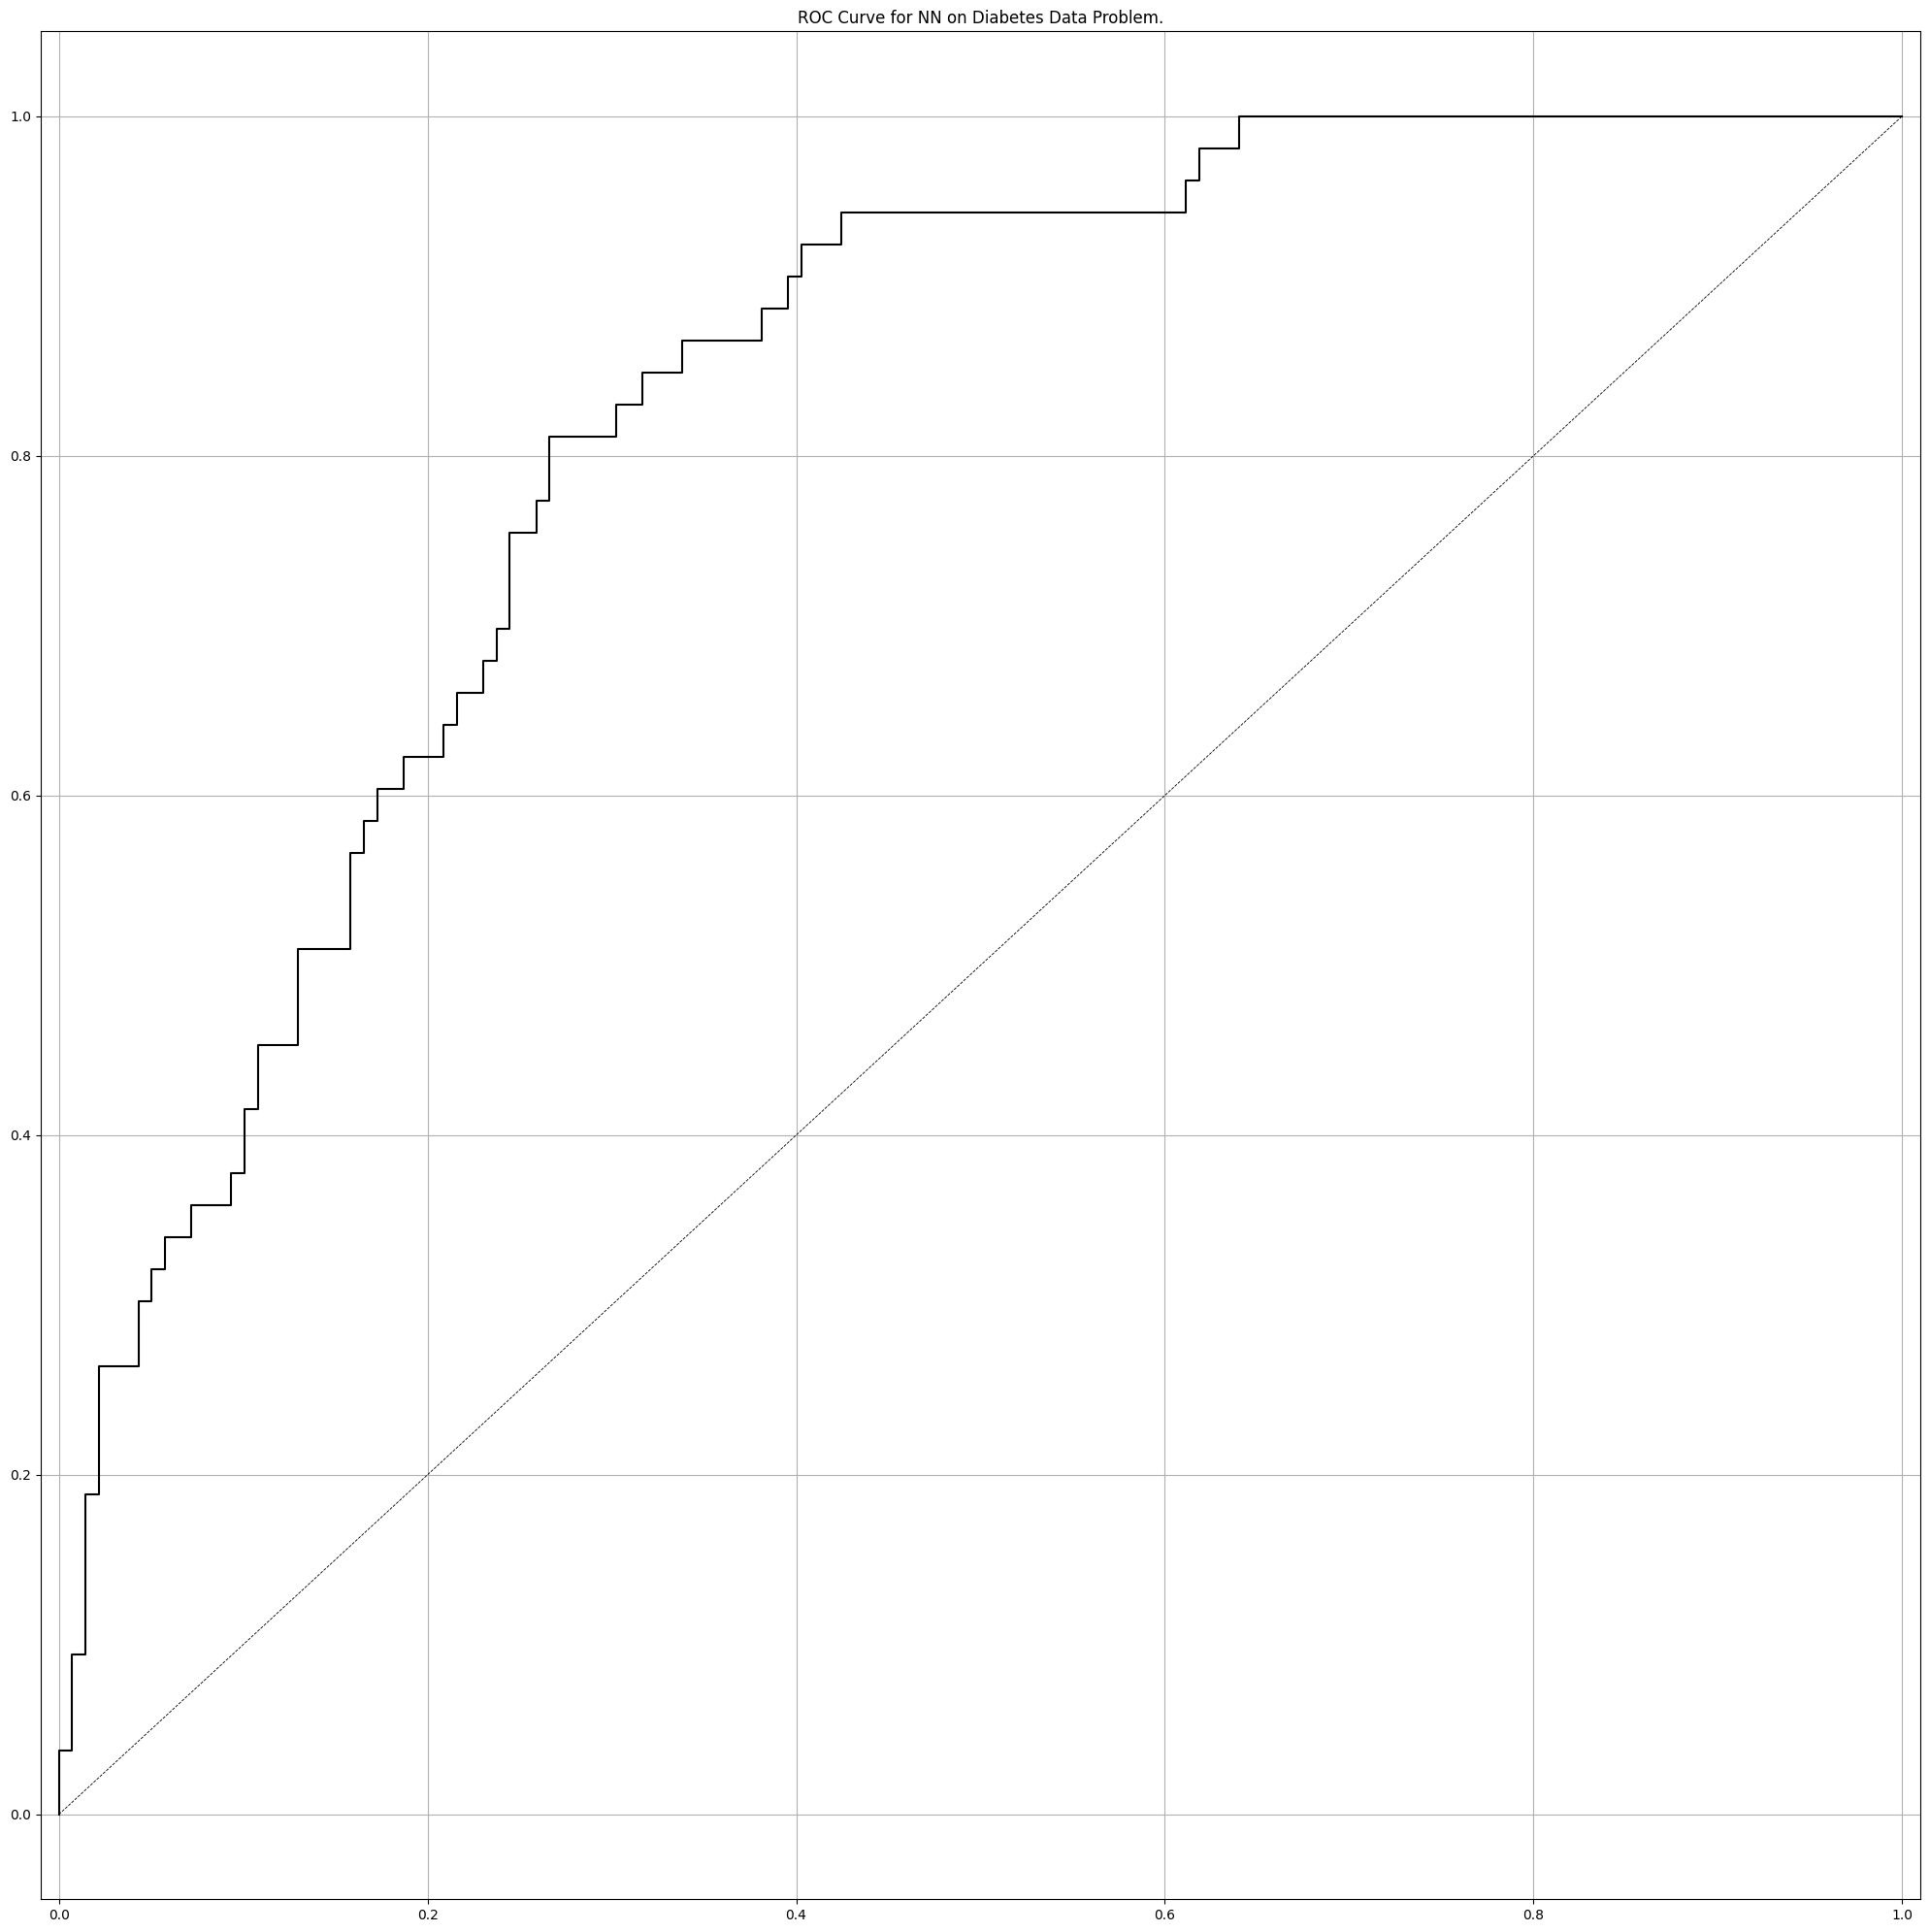

In [30]:
plot(y_test,y_predprob,"NN")

Look at the Run_Hist_01 object that was created, specifically its history attribute.

In [31]:
Run_Hist_01.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

Plot the training loss and the validation loss over the different epochs and see how it looks.

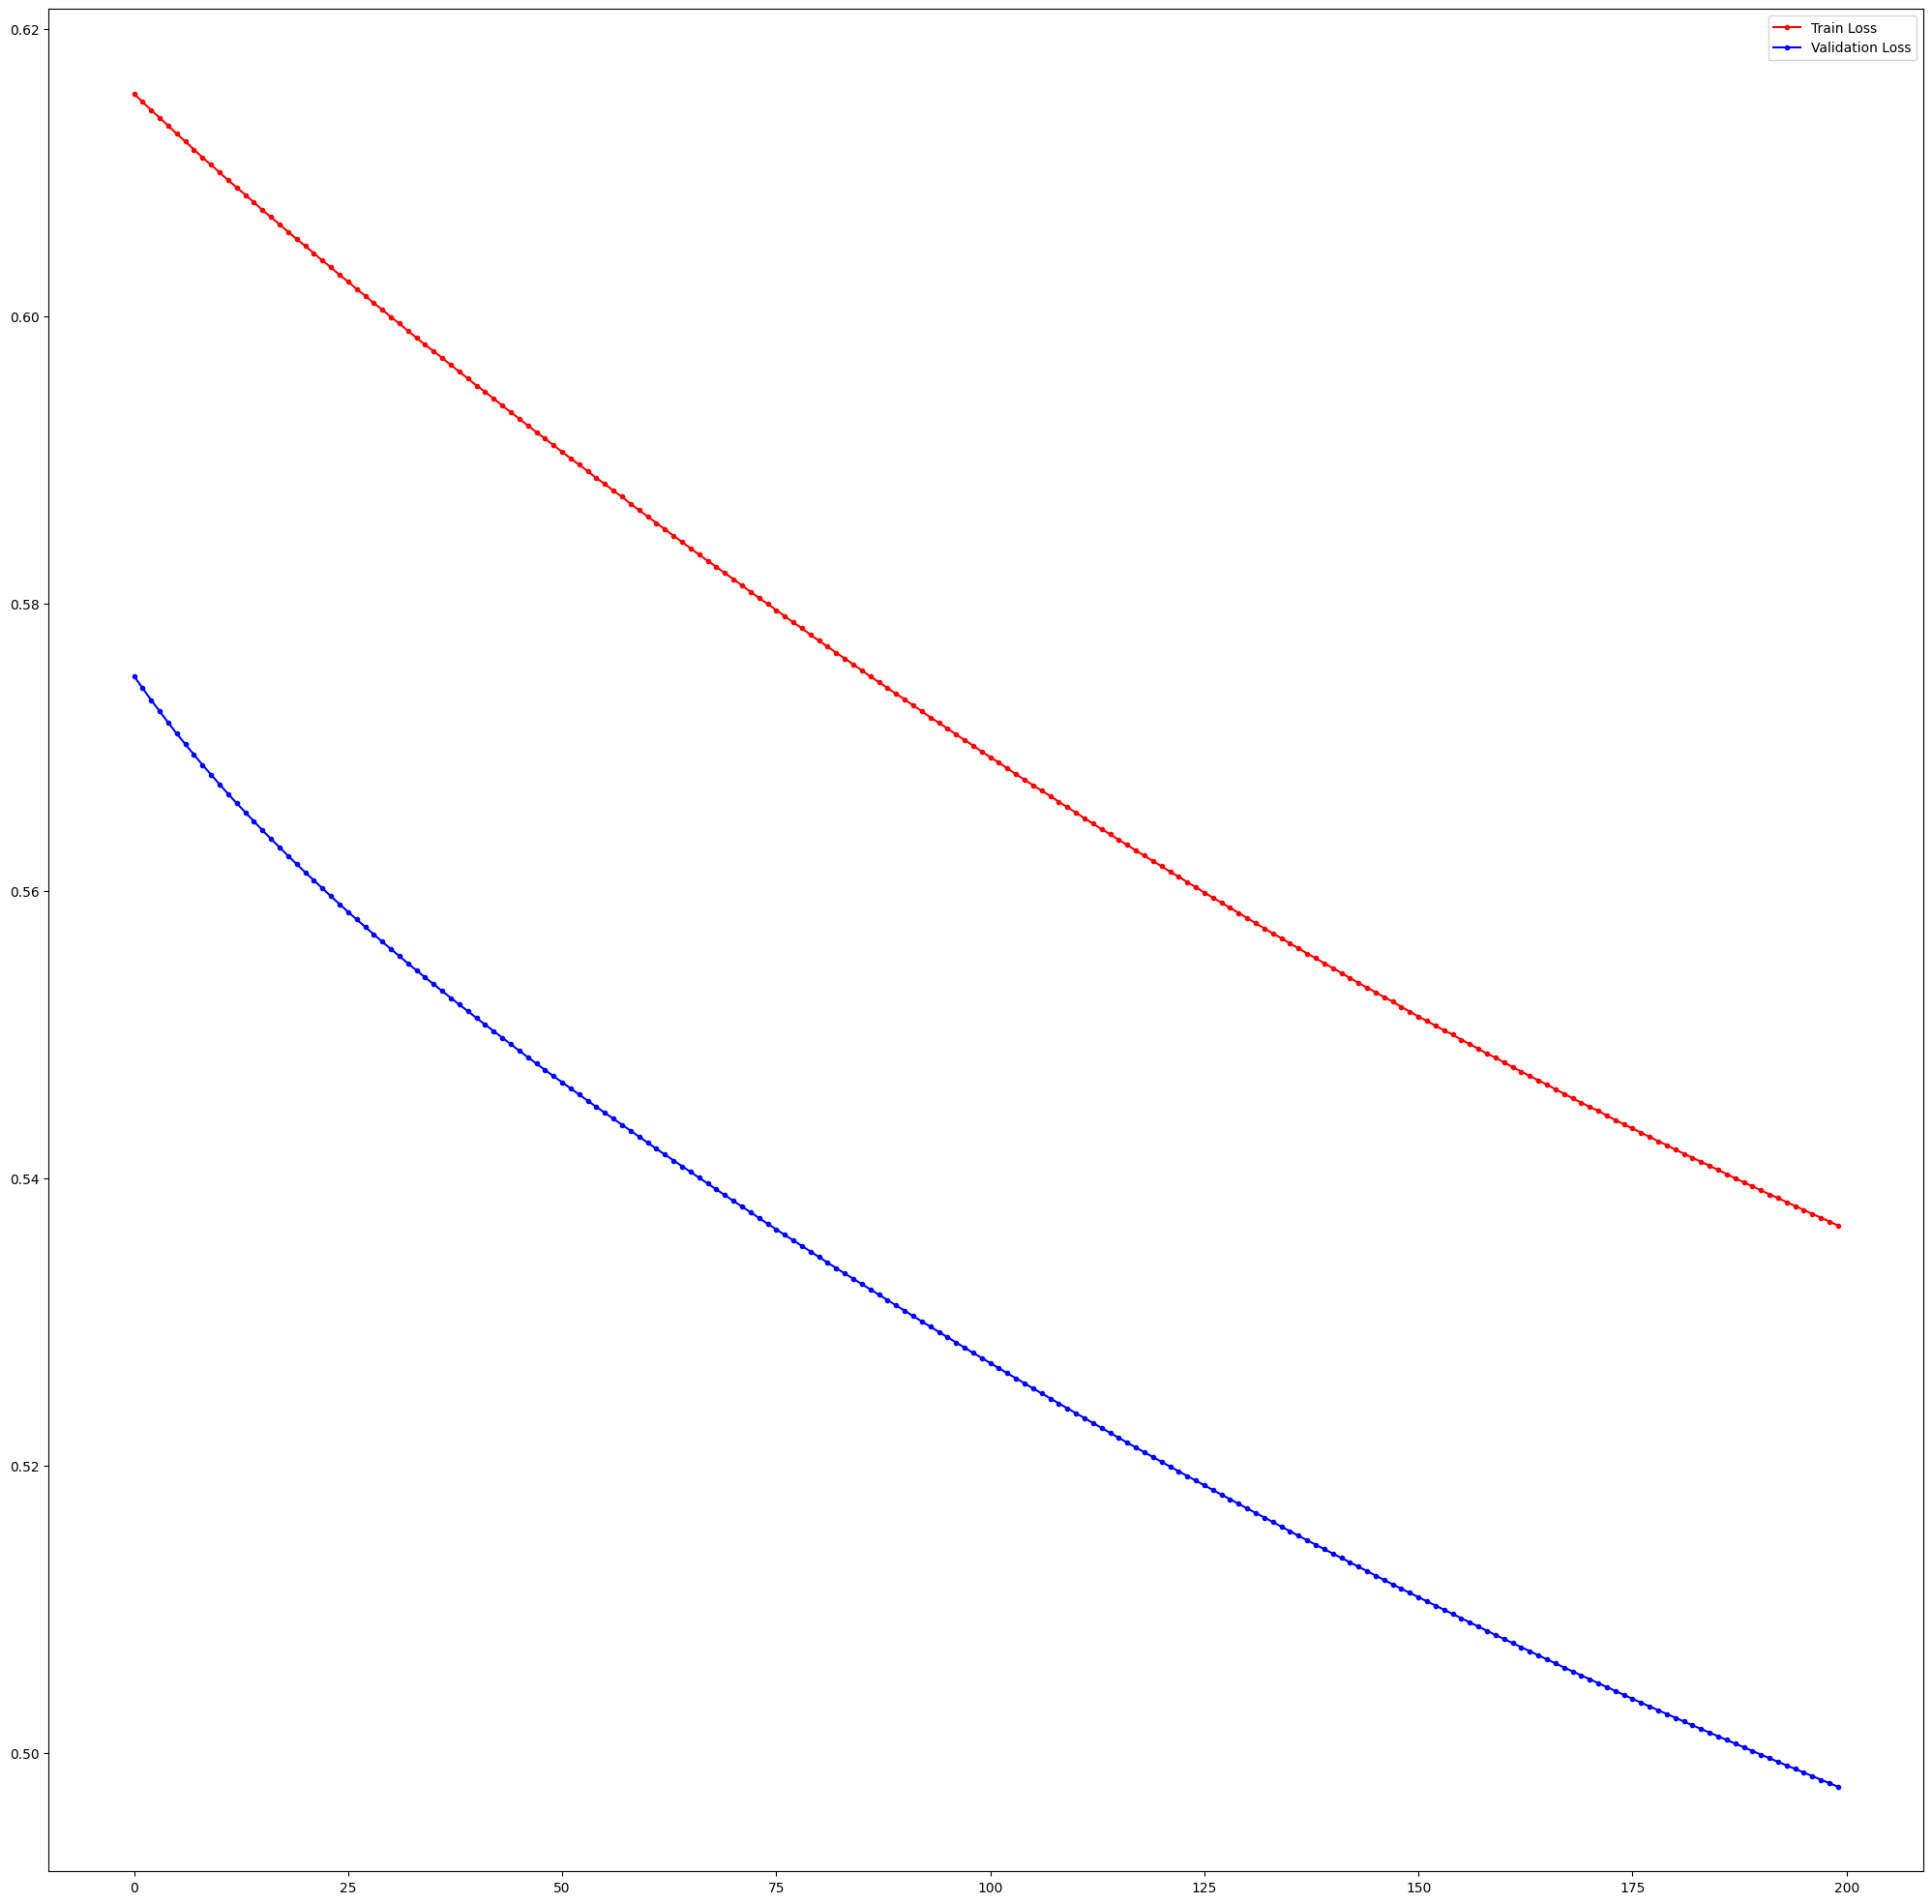

In [32]:
fig, ax = plt.subplots(figsize=(25,25))
ax.plot( Run_Hist_01.history["loss"], "r", marker = ".", label = "Train Loss")
ax.plot( Run_Hist_01.history["val_loss"], "b", marker = ".", label = "Validation Loss")
ax.legend()
plt.show()

Looks like the losses are still going down on both the training set and the validation set. This suggests that the model might benefit from further training. Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

##Fitting again

In [33]:
Run_Hist_02 =  Model_02.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.5365 - Accuracy: 0.7483 - val_loss: 0.4974 - val_Accuracy: 0.7604
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5362 - Accuracy: 0.7483 - val_loss: 0.4972 - val_Accuracy: 0.7604
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5359 - Accuracy: 0.7500 - val_loss: 0.4969 - val_Accuracy: 0.7604
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5357 - Accuracy: 0.7500 - val_loss: 0.4967 - val_Accuracy: 0.7604
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5354 - Accuracy: 0.7500 - val_loss: 0.4964 - val_Accuracy: 0.7604
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5351 - Accuracy: 0.7483 - val_loss: 0.4962 - val_Accuracy: 0.7604
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5349 - Accuracy: 0.7483 - val_loss: 0.4960 - val_Accuracy: 0.7604
Epoch 

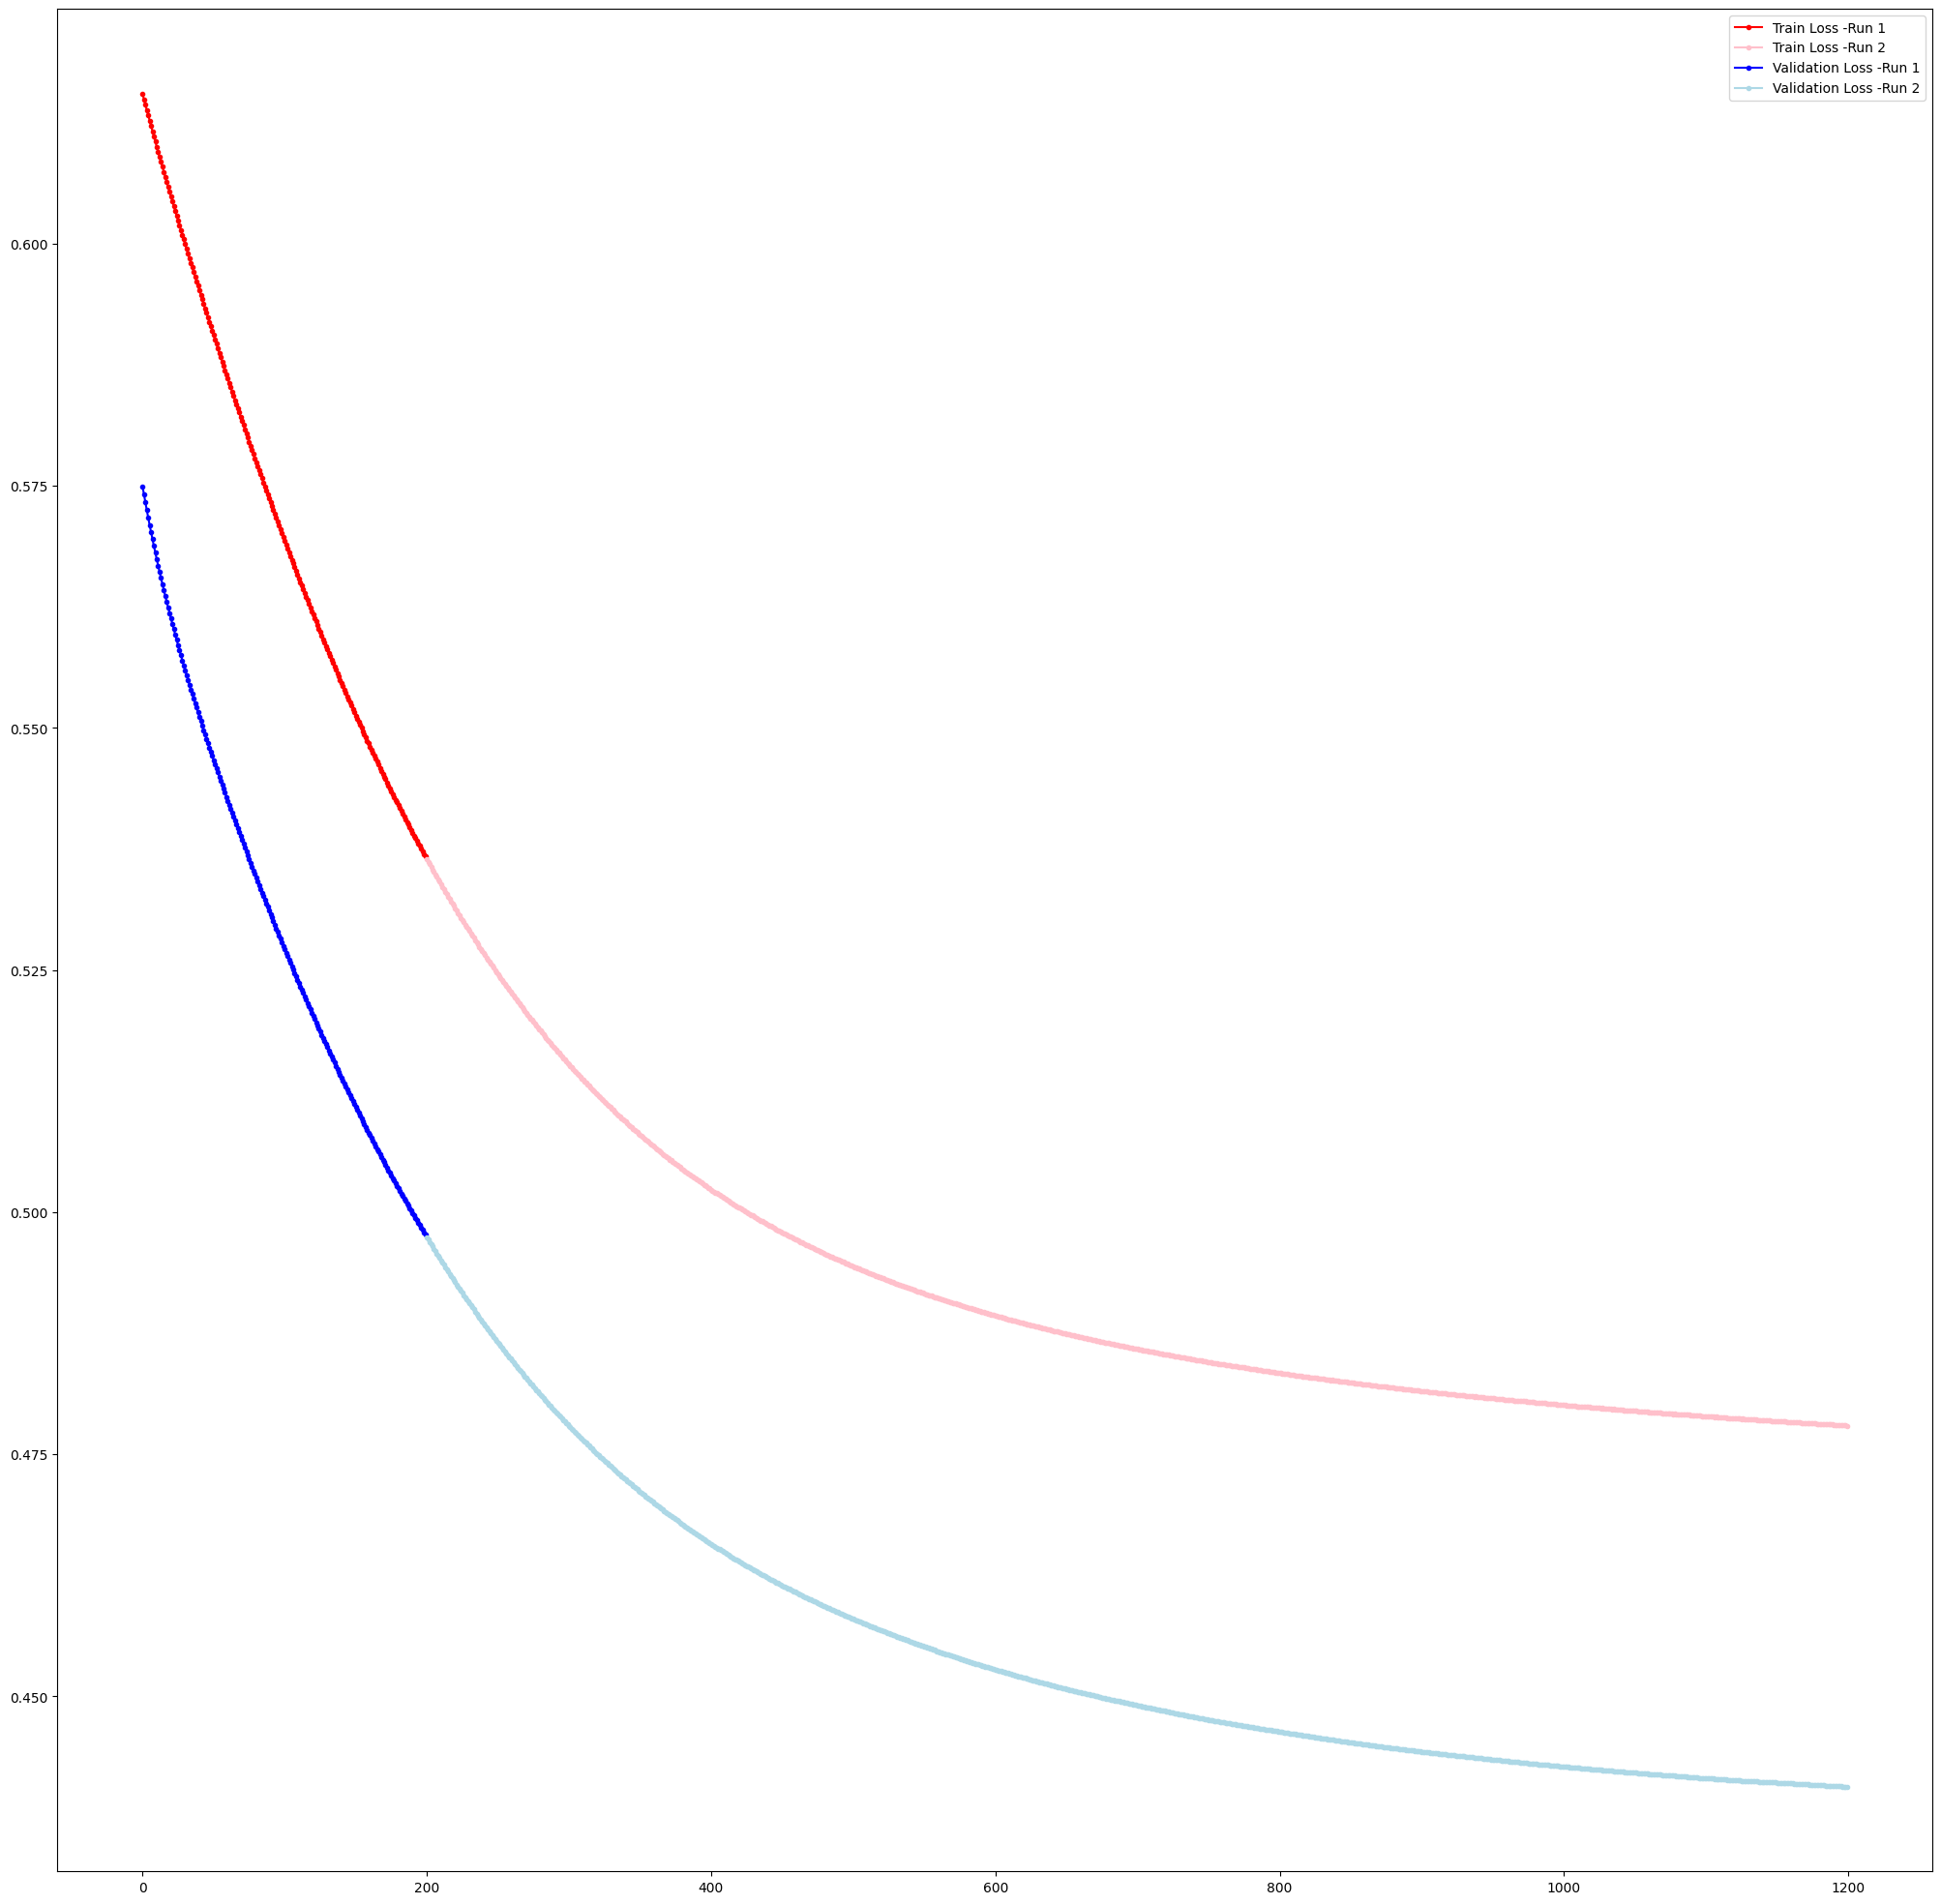

In [34]:
n = len(Run_Hist_01.history["loss"])
m = len(Run_Hist_02.history["loss"])
fig, ax = plt.subplots(figsize=(25,25))
ax.plot(range(n),Run_Hist_01.history["loss"],"r",marker =".",label="Train Loss -Run 1")
ax.plot(range(n,n+m),Run_Hist_02.history["loss"],"pink",marker =".",label="Train Loss -Run 2")
ax.plot(range(n),Run_Hist_01.history["val_loss"],"b",marker =".",label="Validation Loss -Run 1")
ax.plot(range(n,n+m),Run_Hist_02.history["val_loss"],"lightblue",marker =".",label="Validation Loss -Run 2")
ax.legend()
plt.show()

#Rebuild Neural Network

Build a model with two hidden layers, each with 6 nodes
Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
Use a learning rate of .003 and train for 1500 epochs
Graph the trajectory of the loss functions, accuracy on both train and test set
Plot the roc curve for the predictions

In [35]:
Model_03 = Sequential()

In [36]:
Model_03.add(Dense(6,input_shape = (8, ),activation="relu"))
Model_03.add(Dense(6,activation="relu"))
Model_03.add(Dense(1,activation="sigmoid"))

In [37]:
Model_03.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [38]:
Model_03.compile(SGD(learning_rate=0.003),"binary_crossentropy",metrics = ["Accuracy"])
Run_Hist_02 = Model_03.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 0.9869 - Accuracy: 0.3368 - val_loss: 1.0446 - val_Accuracy: 0.2500
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.9498 - Accuracy: 0.3385 - val_loss: 1.0009 - val_Accuracy: 0.2500
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.9182 - Accuracy: 0.3385 - val_loss: 0.9632 - val_Accuracy: 0.2552
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.8910 - Accuracy: 0.3403 - val_loss: 0.9304 - val_Accuracy: 0.2552
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8675 - Accuracy: 0.3472 - val_loss: 0.9017 - val_Accuracy: 0.2552
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8471 - Accuracy: 0.3594 - val_loss: 0.8764 - val_Accuracy: 0.2500
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.8292 - Accuracy: 0.3715 - val_loss: 0.8542 - val_Accuracy: 0.2760
Epoch

In [39]:
Run_Hist_02.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

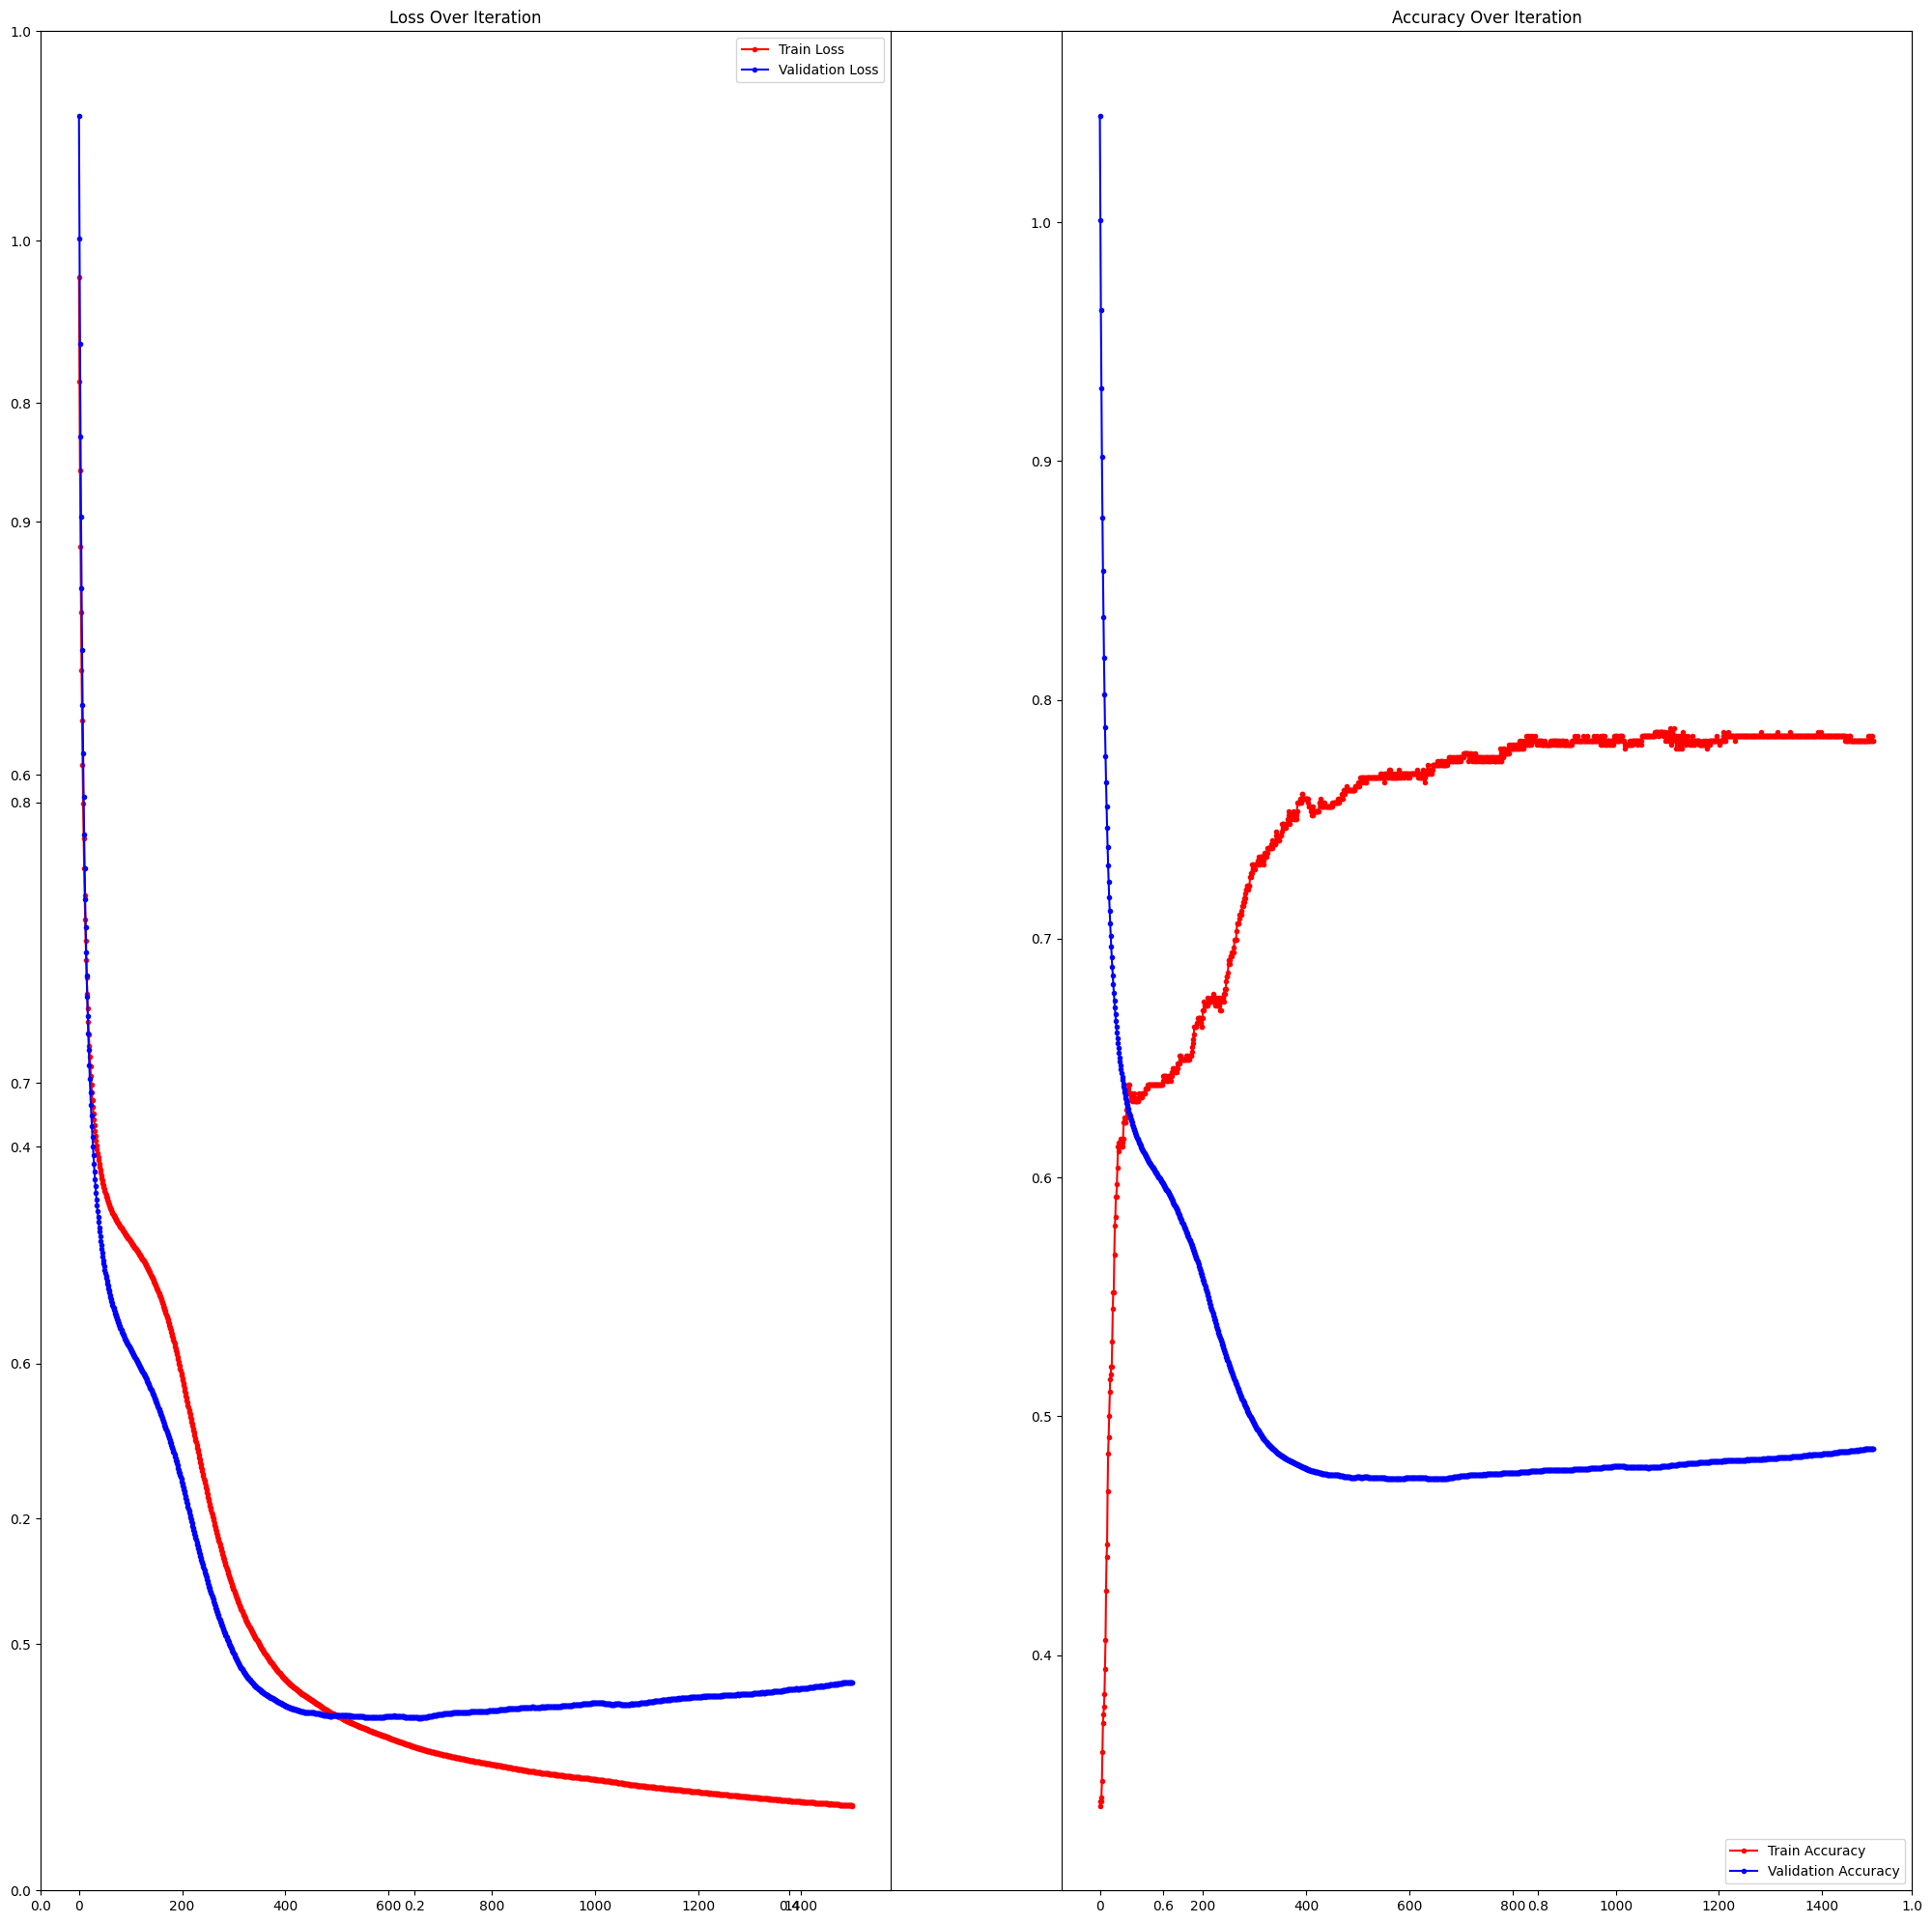

In [40]:
n = len(Run_Hist_02.history["loss"])
fig, ax = plt.subplots(figsize=(25,25))
ax = fig.add_subplot(1,2,1)
ax.plot(range(n),Run_Hist_02.history["loss"],"r",marker =".",label="Train Loss")
ax.plot(range(n),Run_Hist_02.history["val_loss"],"b",marker =".",label="Validation Loss")
ax.legend()
ax.set_title("Loss Over Iteration")

ax = fig.add_subplot(1,2,2)
ax.plot(range(n),(Run_Hist_02.history["Accuracy"]),"r",marker =".",label="Train Accuracy")
ax.plot(range(n),(Run_Hist_02.history["val_loss"]),"b",marker =".",label="Validation Accuracy")
ax.legend(loc = "lower right")
ax.set_title("Accuracy Over Iteration")

plt.show()

In [41]:
y_predprob01 = Model_03.predict(x_test_norm)
y_predclass01 = y_predprob.argmax(axis = -1)

6/6 [==============================] - 0s 2ms/step


In [42]:
y_predprob01

array([[0.7375412 ],
       [0.6303217 ],
       [0.01951327],
       [0.31686574],
       [0.41458407],
       [0.509345  ],
       [0.0269432 ],
       [0.91118926],
       [0.18349466],
       [0.29783762],
       [0.242299  ],
       [0.91190594],
       [0.9142228 ],
       [0.41449884],
       [0.05448187],
       [0.07639372],
       [0.8244843 ],
       [0.38108727],
       [0.42303348],
       [0.89043313],
       [0.0834639 ],
       [0.34776887],
       [0.56164   ],
       [0.4117881 ],
       [0.09147428],
       [0.8803844 ],
       [0.02598743],
       [0.17233913],
       [0.38829562],
       [0.0422902 ],
       [0.12518482],
       [0.06770303],
       [0.77604735],
       [0.14517128],
       [0.03133818],
       [0.05856209],
       [0.4553048 ],
       [0.22299749],
       [0.06426173],
       [0.91464365],
       [0.06761129],
       [0.6476509 ],
       [0.53518414],
       [0.20018053],
       [0.03130197],
       [0.364139  ],
       [0.09240654],
       [0.429

In [43]:
y_predclass01

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

 Model performance and plot the roc curve

In [44]:
print( "Accuracy = {} ".format( accuracy_score( y_test,y_predclass01 ) ) )
print( "Roc-Acc = {} ".format(roc_auc_score( y_test,y_predprob01) ) )

Accuracy = 0.7239583333333334 
Roc-Acc = 0.821094068141713 


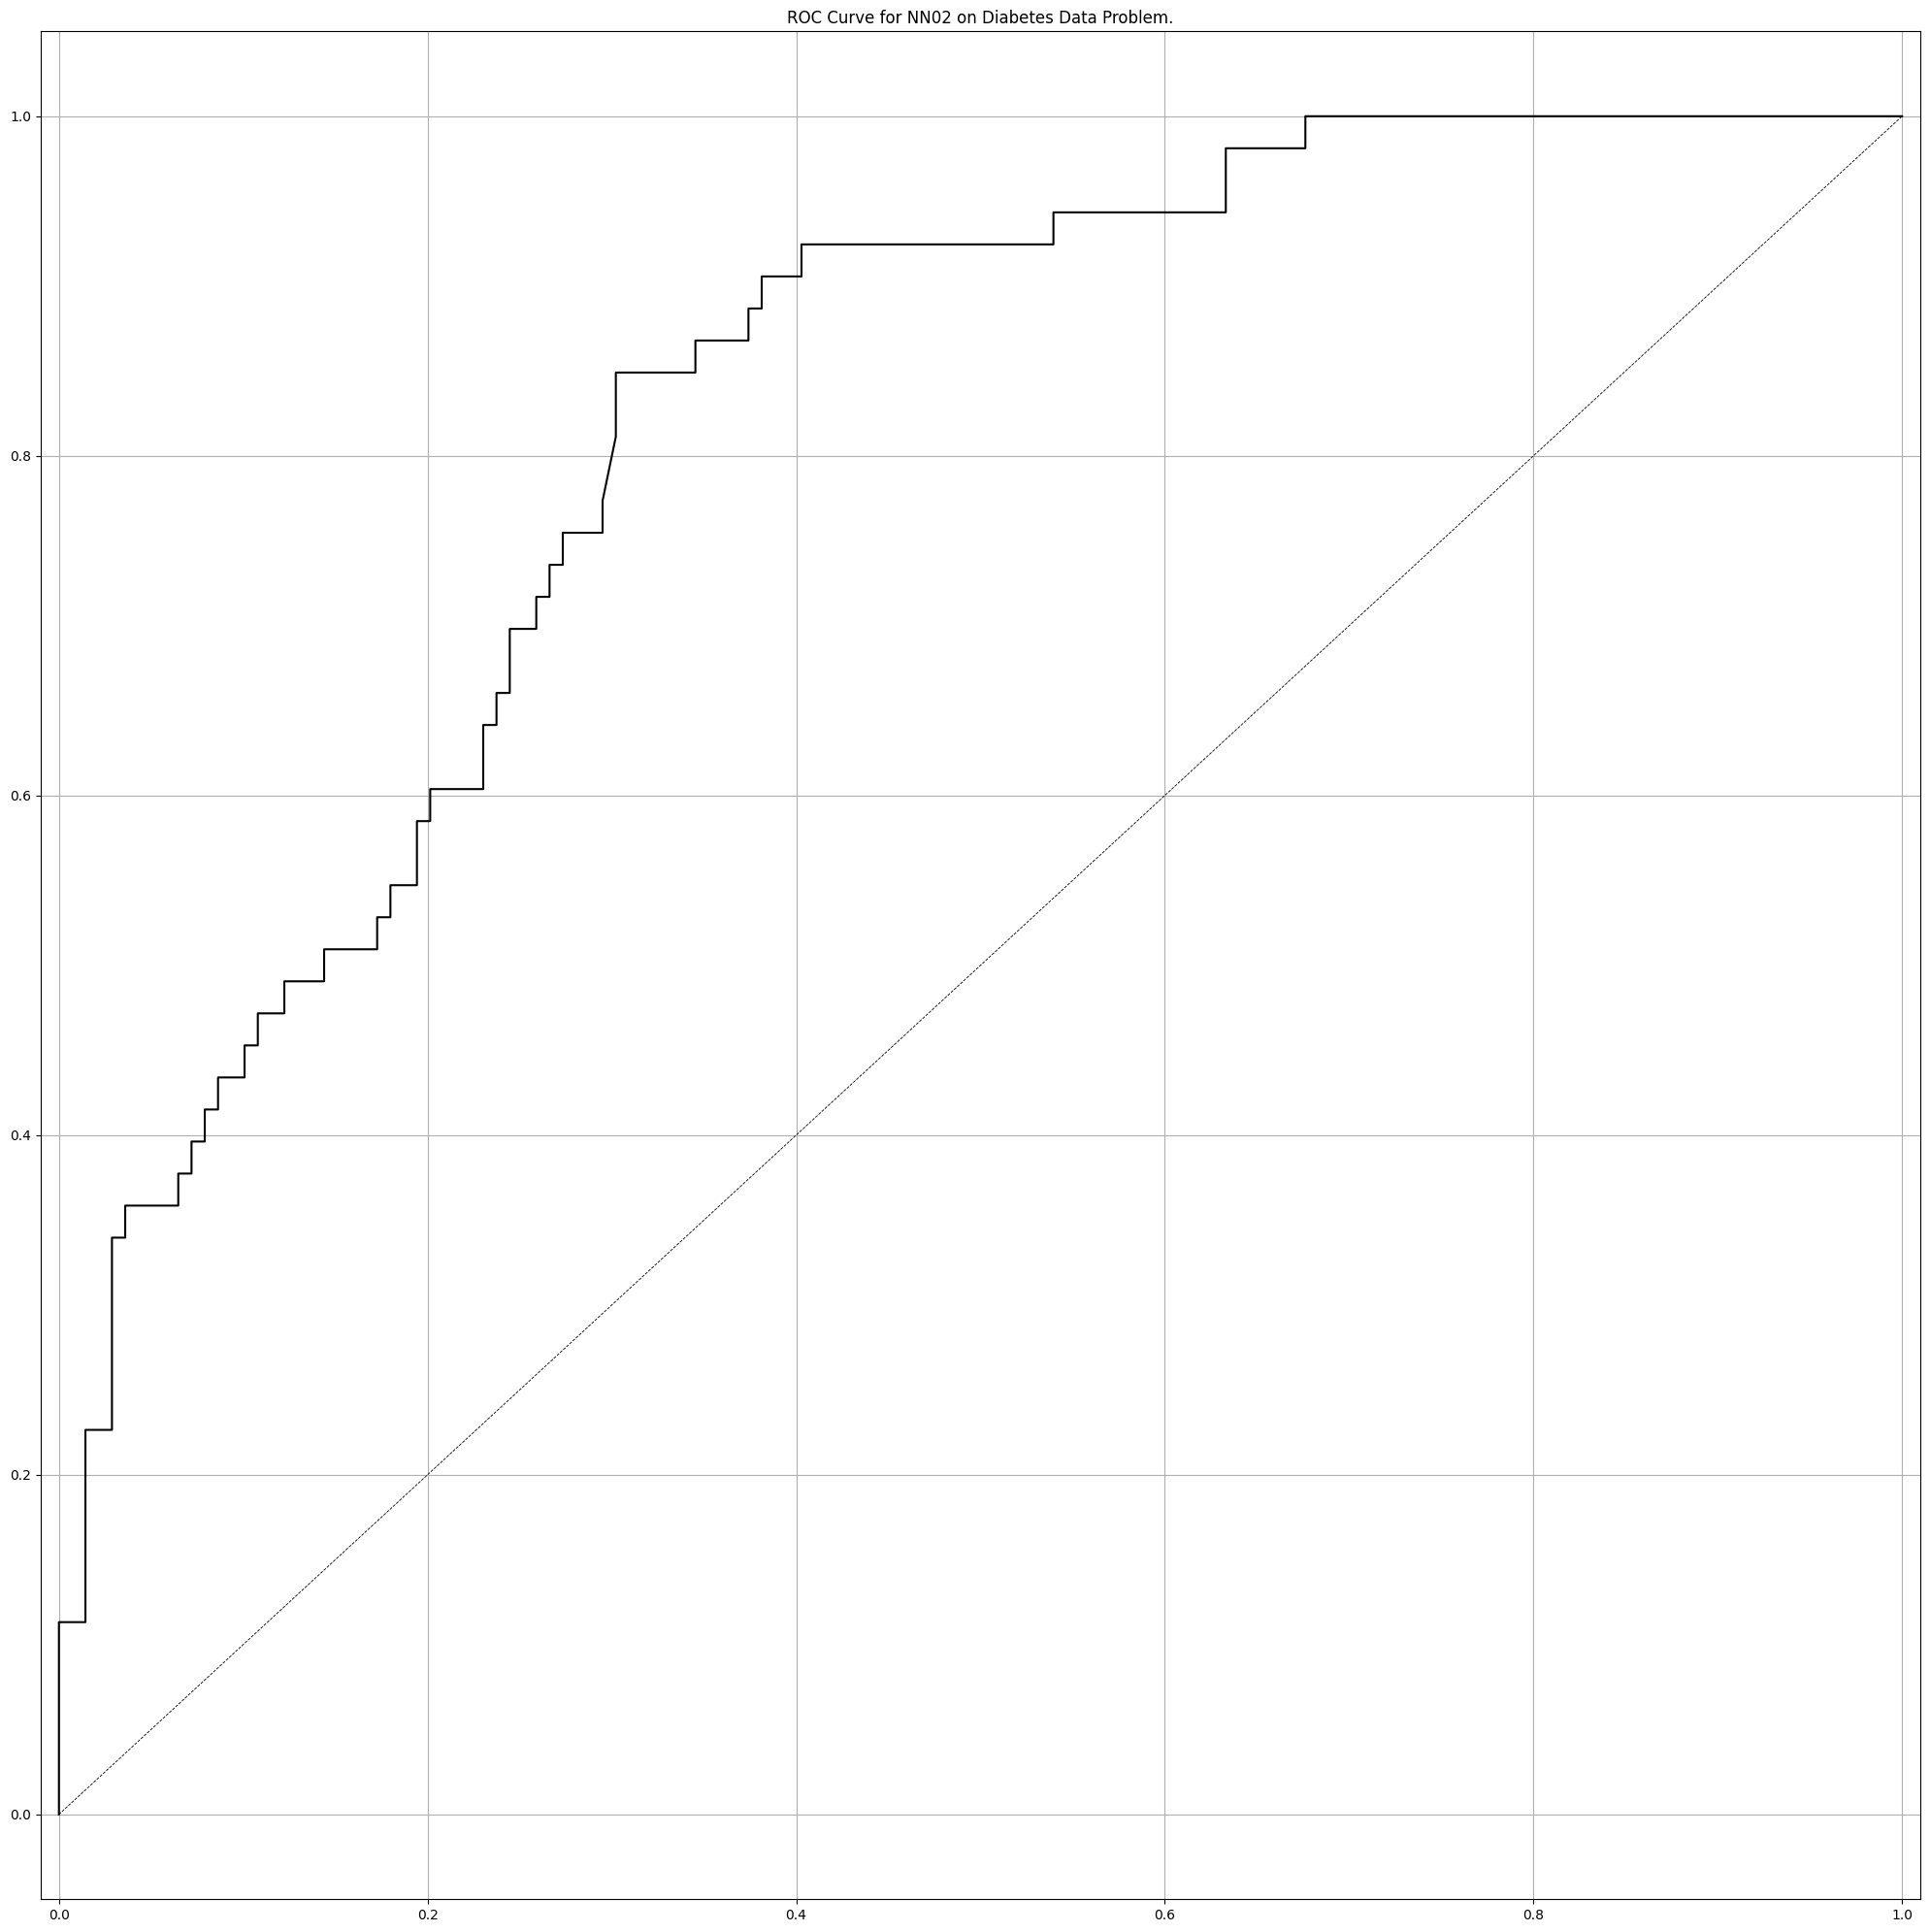

In [45]:
plot(y_test,y_predprob01,"NN02")

In [46]:
print("The End")

The End
